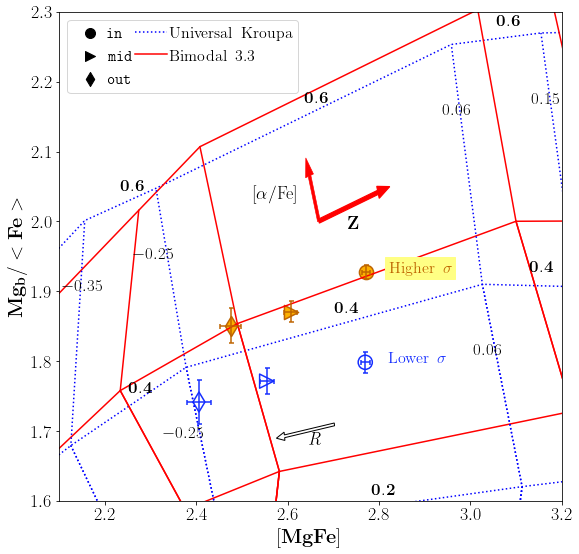

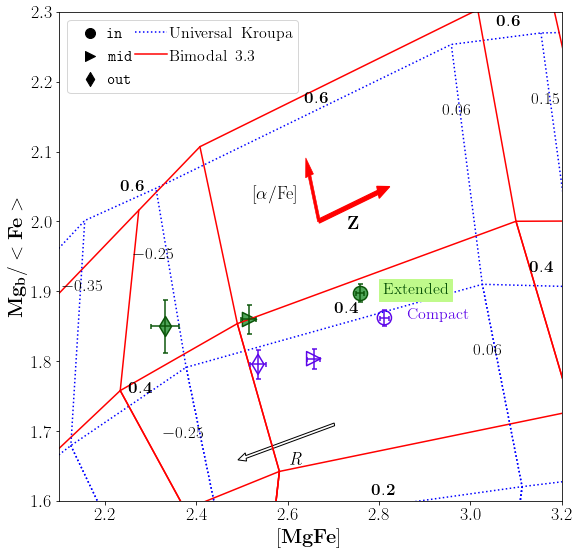

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pyphot
import pandas as pd
from astropy.io import fits
import matplotlib.colors as mcolors
import matplotlib as mpl

# imf_num = 5  # int(sys.argv[1])
imf_name = ['Universal_Kroupa', 'Revised_Kroupa', 'Bimodal_2.8', 'Bimodal_3.0', 'Bimodal_3.3', 'Bimodal_3.5']
imf_labels = [r'$\mathrm{Universal\ Kroupa}$', r'$\mathrm{Revised\ Kroupa}$', r'$\mathrm{Bimodal\ 2.8}$',
              r'$\mathrm{Bimodal\ 3.0}$', r'$\mathrm{Bimodal\ 3.3}$', r'$\mathrm{Bimodal\ 3.5}$']

ssp_headers = ['Mku1.30', 'Mkb1.30', 'Mbi2.80', 'Mbi3.00', 'Mbi3.30', 'Mbi3.50']

split_type = ['mtot_v_m10kpc', 'm10kpc_v_sigmacen', 'm10kpc_v_m20kpc_control', 'm20kpc_v_sigmacen', 'sigma_v_mtot']
# split_num = int(sys.argv[1])
ylims = [1.6, 2.3]
xlims = [2.1, 3.2]
labels = ['Extended', 'Compact']
labels2 = ['high', 'low']
radius_name = ['in', 'mid', 'out']

l = pyphot.LickLibrary()
allindex_names = np.array(['CN_1', 'CN_2', 'Ca4227', 'Fe4383', 'Ca4455',
                           'Fe4531', 'Fe5015', 'Mg_b', 'Fe5270', 'Fe5335',
                           'Fe5406', 'Fe5709', 'Fe5782', 'MgFe', 'Mgb/Fe'])
ssp_names = []
ssp_path = '../data/smiles_ssp/'
idx_path = '../data/index/'
afe = ['aFem02', 'aFep00', 'aFep02', 'aFep04', 'aFep06']
afe_values = [r'$\mathbf{-0.2}$', r'$\mathbf{0.0}$', r'$\mathbf{0.2}$', r'$\mathbf{0.4}$', r'$\mathbf{0.6}$']
iso = ['_iTp0.00', '_iTp0.00', '_iTp0.00', '_iTp0.40', '_iTp0.40']

met = ['Zm1.79', 'Zm1.49', 'Zm1.26', 'Zm0.96', 'Zm0.66',
       'Zm0.35', 'Zm0.25', 'Zp0.06', 'Zp0.15', 'Zp0.26']
met_values = [r'$\mathrm{-1.79}$', r'$\mathrm{-1.49}$', r'$\mathrm{-1.26}$', r'$\mathrm{-0.96}$', r'$\mathrm{-0.66}$',
              r'$\mathrm{-0.35}$', r'$\mathrm{-0.25}$', r'$\mathrm{0.06}$', r'$\mathrm{0.15}$', r'$\mathrm{0.26}$']

ages = np.array(['T00.0300', 'T00.0400', 'T00.0500', 'T00.0600', 'T00.0700', 'T00.0800',
                 'T00.0900', 'T00.1000', 'T00.1500', 'T00.2000', 'T00.2500', 'T00.3000',
                 'T00.3500', 'T00.4000', 'T00.4500', 'T00.5000', 'T00.6000', 'T00.7000',
                 'T00.8000', 'T00.9000', 'T01.0000', 'T01.2500', 'T01.5000', 'T01.7500',
                 'T02.0000', 'T02.2500', 'T02.5000', 'T02.7500', 'T03.0000', 'T03.2500',
                 'T03.5000', 'T03.7500', 'T04.0000', 'T04.5000', 'T05.0000', 'T05.5000',
                 'T06.0000', 'T06.5000', 'T07.0000', 'T07.5000', 'T08.0000', 'T08.5000',
                 'T09.0000', 'T09.5000', 'T10.0000', 'T10.5000', 'T11.0000', 'T11.5000',
                 'T12.0000', 'T12.5000', 'T13.0000', 'T13.5000', 'T14.0000'])

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "monospace",  # "Charter",
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "axes.labelsize": 20,
    "axes.labelweight": "bold"
})



def plot_smiles_grid(imfs, split_num):
    age = 'T10.0000'

    index_names = ['MgFe', 'Mgb/Fe']

    styles = ['b:', 'r-']
    normalize = mcolors.Normalize(vmin=-1.3, vmax=0.3)
    colormap = mpl.cm.PRGn
    color_low = colormap(normalize(-1))
    color_high = colormap(normalize(0))
    colors = [color_high, 'None', color_low]
    edgecolors = ['xkcd:forest', 'xkcd:blue violet']
    markers = ['o', '>', 'd']
    sample_labels = [r'$\mathrm{Extended}$', r'$\mathrm{Compact}$']
    backgroundcolor = ['xkcd:pistachio', 'None']

    if (split_num == 3) | (split_num == 1):
        colors = ['xkcd:yellow orange', 'None', 'xkcd:dark sky blue']
        edgecolors = ['xkcd:orange brown', 'xkcd:vivid blue']
        sample_labels = [r'$\mathrm{Higher\ \sigma}$', r'$\mathrm{Lower\ \sigma}$']
        backgroundcolor = ['xkcd:pale yellow', 'None']

    fig, ax = plt.subplots(1, 1, figsize=(9, 9), clear=True)
    arrow_data = {'ssp': [{}, {}], 'sample': [{}, {}]}

    for imf_num, imf in enumerate(imfs):
        df = pd.read_csv(ssp_path + imf_name[imf] + '_ssp.csv')
        for i in range(len(afe)):
            data = [[], []]
            # ssp_name = met[j] + age
            ssp_name = age + iso[i] + '_ACFep00_' + afe[i]
            idx = np.core.defchararray.find(np.array(df['Unnamed: 0'].values, dtype=str), ssp_name) != -1
            label = np.array(df['Unnamed: 0'].values[idx], dtype=str)
            for j in range(len(met)):
                idx_tmp = np.core.defchararray.find(label, met[j]) != -1
                for k, name in enumerate(index_names):
                    data_tmp = df[name].values[idx]
                    val_tmp = data_tmp[idx_tmp][0]
                    data[k].append(val_tmp)
                    if imf_num == 0:
                        if (met[j] == 'Zp0.06') or (met[j] == 'Zm0.25'):
                            if afe[i] == 'aFep04':
                                arrow_data['ssp'][k][met[j] + afe[i]] = val_tmp
                                arrow_data['sample'][k][met[j] + afe[i]] = val_tmp
                            if afe[i] == 'aFep06':
                                arrow_data['ssp'][k][met[j] + afe[i]] = val_tmp
                            if afe[i] == 'aFep02':
                                arrow_data['sample'][k][met[j] + afe[i]] = val_tmp

                if (imf_num==0)&(data[0][j] + 0.04 >= xlims[0]) & (data[0][j] + 0.04 <= xlims[1]) & \
                        (data[1][j] - 0.1 >= ylims[0]) & (data[1][j] - 0.1 <= ylims[1]):
                    ax.text(data[0][j] + 0.04, data[1][j] - 0.1, met_values[j], fontsize=17,ha='right')

            if (imf_num == 0)&(i>2):
                ax.text(np.nanmean(data[0][-5:-3]), np.nanmean(data[1][-5:-3]) + 0.02, afe_values[i], fontsize=17)
                ax.text(np.nanmean(data[0][-4:-2]), np.nanmean(data[1][-4:-2]) + 0.02, afe_values[i], fontsize=17)
                ax.text(np.nanmean(data[0][-3:-1]), np.nanmean(data[1][-3:-1]) + 0.02, afe_values[i], fontsize=17)
            elif (imf_num == 0)&(i==2):
                ax.text(np.nanmean(data[0][-4:-2]), np.nanmean(data[1][-4:-2]) + 0.02, afe_values[i], fontsize=17)

            ax.plot(data[0], data[1], styles[imf_num])

    for imf_num, imf in enumerate(imfs):
        df = pd.read_csv(ssp_path + imf_name[imf] + '_ssp.csv')
        for i in range(len(met)):
            data = [[], []]
            ssp_name = met[i] + age
            # ssp_name = age + iso[i] + '_ACFep00_' + afe[i]
            idx = np.core.defchararray.find(np.array(df['Unnamed: 0'].values, dtype=str), ssp_name) != -1
            label = np.array(df['Unnamed: 0'].values[idx], dtype=str)
            for j in range(len(afe)):
                idx_tmp = np.core.defchararray.find(label, afe[j]) != -1
                for k, name in enumerate(index_names):
                    data_tmp = df[name].values[idx]
                    data[k].append(data_tmp[idx_tmp])
                ax.plot(data[0], data[1], styles[imf_num])
    pca = 0
    dirc = {labels2[0]: [[], []], labels2[1]: [[], []]}
    for k1 in range(2):
        for k2 in range(3):
            index = fits.open(idx_path + split_type[split_num] + '/indices_linear_deg_' + radius_name[k2] + '_etg_'
                              + split_type[split_num] + '_total_' + labels2[k1] + '.fits')
            xerr, yerr = np.nanstd(index[1].data[index_names[0]][pca]), np.nanstd(index[1].data[index_names[1]][pca])
            ax.errorbar([index[1].data[index_names[0]][pca][0]], [index[1].data[index_names[1]][pca][0]],
                        xerr=[xerr], yerr=[yerr],
                        ecolor=edgecolors[k1], linewidth=1.5, capsize=2.5, capthick=1.5, linestyle=None,
                        alpha=1)
            ax.scatter([index[1].data[index_names[0]][pca][0]], [index[1].data[index_names[1]][pca][0]],
                       edgecolors=edgecolors[k1], facecolors=colors[k1], linewidths=1.5, s=200,
                       marker=markers[k2],
                       alpha=1)
            dirc[labels2[k1]][0].append(index[1].data[index_names[0]][pca][0])
            dirc[labels2[k1]][1].append(index[1].data[index_names[1]][pca][0])
            if k2 == 0:
                ax.text(index[1].data[index_names[0]][pca][0] + 0.05,
                        index[1].data[index_names[1]][pca][0],
                        sample_labels[k1], color=edgecolors[k1], fontsize=16, backgroundcolor=backgroundcolor[k1],
                        ha='left')

    ax.scatter([], [], s=100, marker=markers[0], color='black', label=radius_name[0])
    ax.scatter([], [], s=100, marker=markers[1], color='black', label=radius_name[1])
    ax.scatter([], [], s=100, marker=markers[2], color='black', label=radius_name[2])
    ax.plot([], [], styles[0], label=imf_labels[imfs[0]])
    ax.plot([], [], styles[1], label=imf_labels[imfs[1]])
    ax.legend(fontsize=16, ncol=2, loc='upper left',columnspacing=0.2,handletextpad=0.1)
    ax.set_xlabel(r'$\mathbf{[MgFe]}$')
    ax.set_ylabel(r'$\mathbf{Mg_b/<Fe>}$')
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.arrow(np.nanmean(list(arrow_data['ssp'][0].values())),
             np.nanmean(list(arrow_data['ssp'][1].values())),
             0.2 * (arrow_data['ssp'][0]['Zp0.06aFep06'] - arrow_data['ssp'][0]['Zm0.25aFep06']),
             0.2 * (arrow_data['ssp'][1]['Zp0.06aFep06'] - arrow_data['ssp'][1]['Zm0.25aFep06']),
             width=0.006, lw=1.2, color='red')
    ax.text(np.nanmean(list(arrow_data['ssp'][0].values())) + 0.1 * (
            arrow_data['ssp'][0]['Zp0.06aFep06'] - arrow_data['ssp'][0]['Zm0.25aFep06']),
            np.nanmean(list(arrow_data['ssp'][1].values())) - 0.05 * (
                    arrow_data['ssp'][1]['Zp0.06aFep06'] - arrow_data['ssp'][1]['Zm0.25aFep06']),
            r'$\mathbf{Z}$', fontsize=18)

    ax.arrow(np.nanmean(list(arrow_data['ssp'][0].values())),
             np.nanmean(list(arrow_data['ssp'][1].values())),
             -0.1 * (arrow_data['ssp'][1]['Zp0.06aFep06'] - arrow_data['ssp'][1]['Zm0.25aFep06']),
             0.1 * (arrow_data['ssp'][0]['Zp0.06aFep06'] - arrow_data['ssp'][0]['Zm0.25aFep06']),
             width=0.006, lw=0.6, color='red')
    ax.text(np.nanmean(list(arrow_data['ssp'][0].values())) - 0.7 * (
            arrow_data['ssp'][1]['Zp0.06aFep06'] - arrow_data['ssp'][1]['Zm0.25aFep06']),
            np.nanmean(list(arrow_data['ssp'][1].values())) + 0.05 * (
                    arrow_data['ssp'][0]['Zp0.06aFep06'] - arrow_data['ssp'][0]['Zm0.25aFep06']),
            r'$\mathrm{[\alpha/Fe]}$', fontsize=18)

    dx_s = np.nanmean(dirc['low'][0]) - np.nanmean(dirc['high'][0])
    dy_s = np.nanmean(dirc['low'][1]) - np.nanmean(dirc['high'][1])
    dx_r = dirc['low'][0][0] - dirc['low'][0][2]
    dy_r = dirc['low'][1][0] - dirc['low'][1][2]
    wei_x, wei_y = list(arrow_data['sample'][0].values()), list(arrow_data['sample'][1].values())
    wei_x.reverse()
    wei_y.reverse()
    x_s = np.average(list(arrow_data['sample'][0].values()), weights=wei_x)
    y_s = np.average(list(arrow_data['sample'][1].values()), weights=wei_y)
    ax.arrow(x_s, y_s,
             -(0.7 - (split_num - 2) * 0.4) * dx_r, -(0.7 - (split_num - 2) * 0.4) * dy_r,
             width=0.004, lw=1, edgecolor='black', facecolor='None')
    ax.text(x_s - (0.35 - (split_num - 2) * 0.2) * dx_r,
            y_s - (0.85 - (split_num - 2) * 0.35) * dy_r,
            r'$\mathit{R}$', fontsize=18)

    return arrow_data


if __name__ == '__main__':
    data = plot_smiles_grid([0, 4], 3)
    data2 = plot_smiles_grid([0, 4], 2)